<a href="https://colab.research.google.com/github/SonuDash/test_codes/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flower Classification Model

##Importing packages

In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Data Loading

In [4]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228827136/228813984 [==============================] - 11s 0us/step


In [5]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [7]:
round(len(images)*0.8)

639

In [8]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

##Data Augmentation

In [9]:
batch_size = 100
IMG_SHAPE = 150

In [10]:
#this function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

###Flipping Horizontally

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


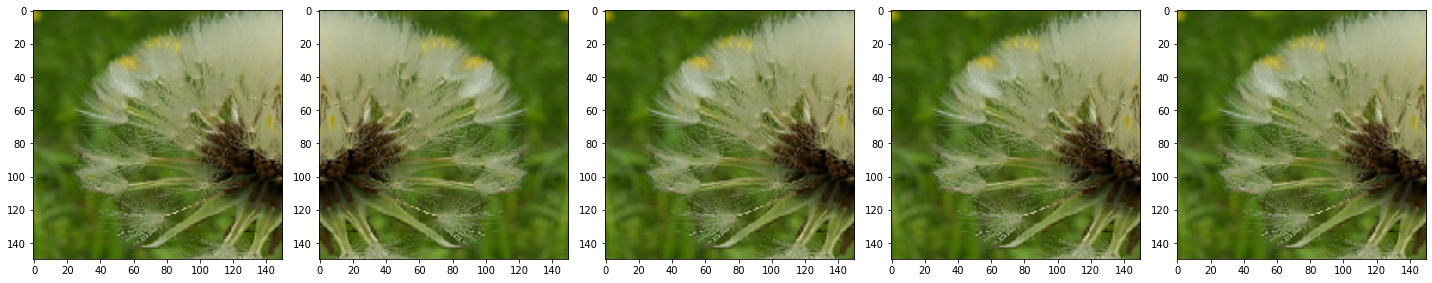

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

###Rotating the Image

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=90)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


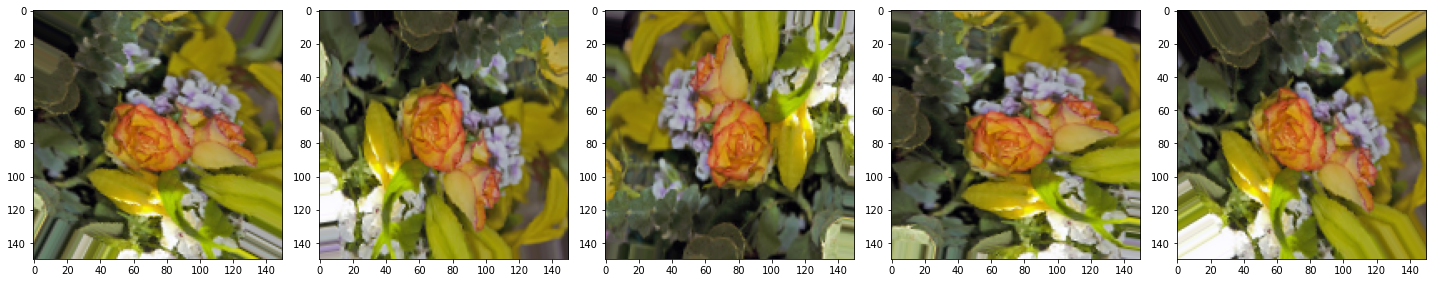

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

###Applying random Zoom


In [15]:
imge_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory = train_dir,
                                               shuffle=True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE)
                                               )

Found 2935 images belonging to 5 classes.


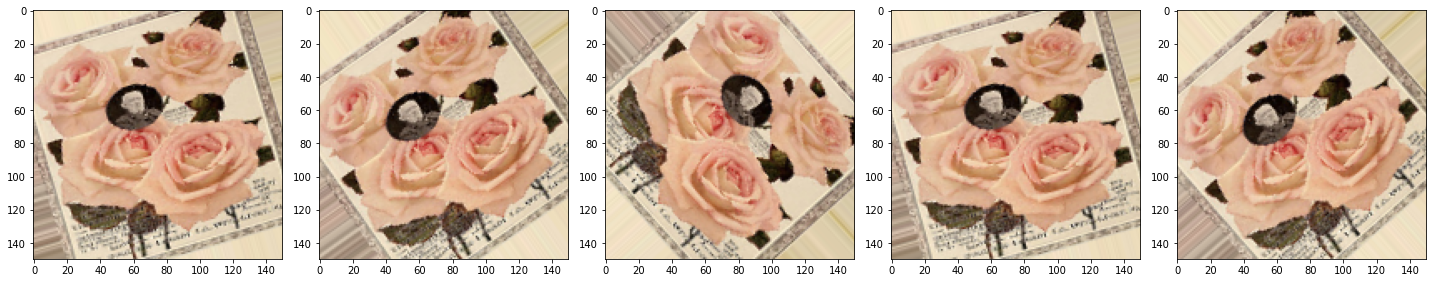

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

###Putting all things togeter

In [17]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    horizontal_flip = True,
    zoom_range = 0.5,
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse'
                                                     )

Found 2935 images belonging to 5 classes.


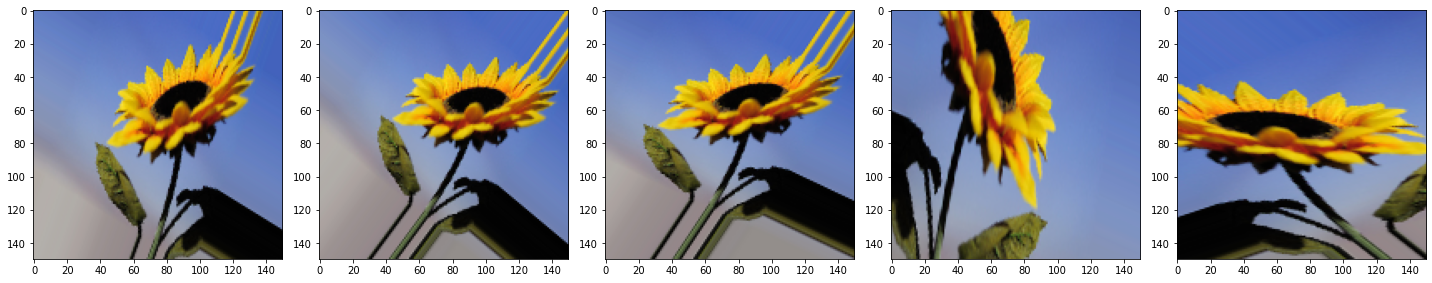

In [18]:
augmented_images = [train_data_gen[0][0][0] for i  in range(5)]
plotImages(augmented_images)

##Creating Vallidation Data Generator

In [19]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'sparse')

Found 735 images belonging to 5 classes.


##Model Creation

###Defining the model

In [20]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

###Compiling the Model

In [21]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Summary of the Model

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

##Training the model

In [23]:
epochs = 100

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
30/30 [==============================] - 34s 742ms/step - loss: 1.4889 - accuracy: 0.3421 - val_loss: 1.2514 - val_accuracy: 0.4707
Epoch 2/100
30/30 [==============================] - 23s 753ms/step - loss: 1.1565 - accuracy: 0.5128 - val_loss: 1.1379 - val_accuracy: 0.5619
Epoch 3/100
30/30 [==============================] - 22s 741ms/step - loss: 1.0987 - accuracy: 0.5438 - val_loss: 1.0387 - val_accuracy: 0.5905
Epoch 4/100
30/30 [==============================] - 22s 745ms/step - loss: 1.0286 - accuracy: 0.5901 - val_loss: 1.0615 - val_accuracy: 0.5864
Epoch 5/100
30/30 [==============================] - 23s 775ms/step - loss: 0.9994 - accuracy: 0.5997 - val_loss: 0.9940 - val_accuracy: 0.6177
Epoch 6/100
30/30 [==============================] - 22s 741ms/step - loss: 0.9350 - accuracy: 0.6324 - val_loss: 0.8791 - val_accuracy: 0.6626
Epoch 7/100
30/30 [==============================] - 22s 743ms/step - loss: 0.9357 - accuracy: 0.6266 - val_loss: 0.8543 - val_accuracy:

Text(0.5, 1.0, 'Validation and Training Loss')

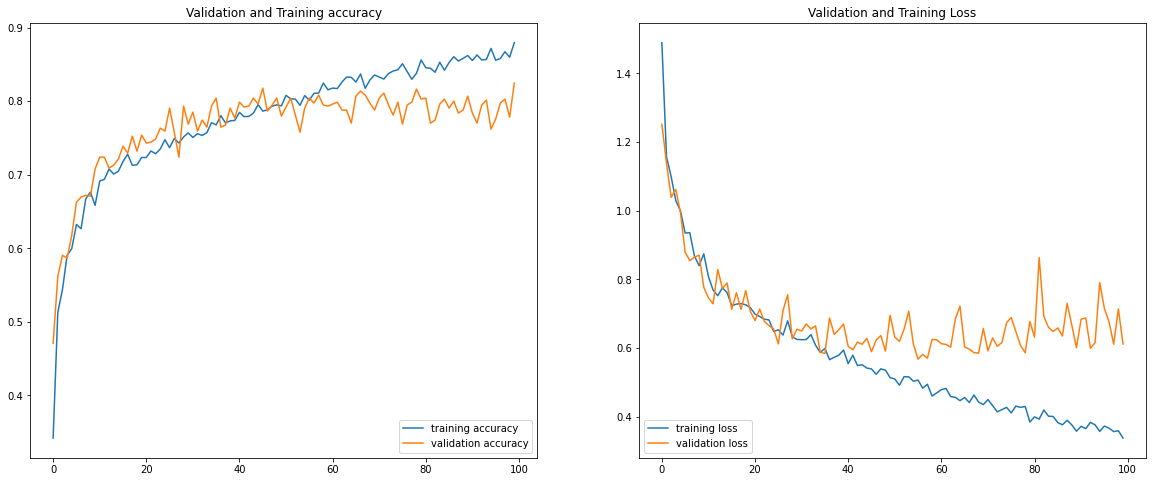

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(epochs)
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='training accuracy')
plt.plot(epoch_range, val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Validation and Training accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='training loss')
plt.plot(epoch_range, val_loss, label='validation loss')
plt.legend(loc='lower left')
plt.title('Validation and Training Loss')